<a href="https://colab.research.google.com/github/PyBeginner1/Covid19/blob/main/CovidMoreAnalysis/CovidAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
confirmed = pd.read_csv('confirmed.csv')
death = pd.read_csv('deaths.csv')
recovered = pd.read_csv('recovered.csv')

In [49]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455


In [50]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2642,2648,2654,2664,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2399,2402,2403,2406,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3280,3289,3299,3307,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,603,609,618,622,628,630,633,636,639,645,649,651,655,659,677,685,696,704,709,715,725,731,735,742,745,749,757,764,766,772,780,784,788,794,797,800,803,811,815,819


In [51]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53391,53694,53750,53961,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,111792,112626,113468,114362,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,85534,85693,85869,86007,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12793,12818,12884,12900,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24190,24190,24492,24503,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101


In [52]:
confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
death = death.drop(['Province/State', 'Lat', 'Long'], axis = 1)
recovered = recovered.drop(['Province/State', 'Lat', 'Long'], axis = 1)

In [53]:
confirmed.tail()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21
271,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048
272,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018
273,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,6823,6832,6836,6856
274,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91722,91804,91849,91946,92004,92057,92092,92112,92152,92211,92262,92356,92409,92436,92460,92520,92630,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751,95050,95263,95821,96563,97388,98376,99540,100278,100765,101996,103763,105909,107974
275,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38293,38327,38357,38398,38403,38414,38419,38433,38448,38466,38491,38535,38554,38560,38572,38595,38612,38635,38664,38679,38682,38696,38706,38819,38854,38918,38933,38944,38961,38998,39031,39092,39144,39168,39189,39238,39321,39432,39496,39688


In [54]:
confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
death = death.groupby(death['Country/Region']).aggregate('sum')
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

In [55]:
confirmed = confirmed.T
death = death.T
recovered = recovered.T

In [56]:
#new cases every day
new_cases = confirmed.copy()
for day in range(1, len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]
new_cases.tail(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
6/2/21,1049,14,422,15,208,2,35017,92,13,400,156,68,1936,1988,6,915,1859,14,24,7,3310,79,0,95601,0,197,0,72,25,171,750,0,2184,0,1,5616,24,27000,1,187,...,287,0,8,31,124,374,0,24,5782,0,4984,3306,25,300,0,717,30,547,0,0,3440,149,15,412,1925,7181,16913,915,2335,2154,4264,3518,231,0,1188,245,304,8,742,33
6/3/21,1093,9,336,8,180,0,32291,108,4,282,128,66,1932,1687,3,879,1599,7,0,15,2429,80,1244,83391,0,170,11,122,16,80,729,0,2173,0,0,8128,25,28624,0,0,...,218,0,6,45,139,273,0,8,5360,0,5250,3297,119,248,8520,588,32,585,0,0,3886,112,17,546,1576,6602,19074,1083,2707,1989,5181,2887,271,0,1258,193,297,8,825,61
6/4/21,1509,12,385,6,167,1,30950,72,16,333,123,0,1492,1887,3,1183,1449,21,0,15,3000,52,0,37936,0,157,1,212,17,133,886,0,2034,0,3,8245,25,30000,4,75,...,210,537,6,13,94,281,0,0,5668,0,4969,3410,0,333,1069,491,28,472,0,0,2630,89,9,529,1816,6169,16860,1247,2393,2062,6144,4079,201,0,1239,301,311,6,988,52
6/5/21,1335,2,320,0,287,0,23627,93,16,271,108,0,1432,1447,1,857,1468,0,0,13,2277,0,0,66017,0,89,5,96,20,96,538,0,1349,0,1,8920,31,28971,0,0,...,145,0,20,18,117,245,0,30,5450,0,0,3103,0,283,0,0,20,510,0,0,2818,148,11,391,1479,6126,13908,670,2031,2188,5655,4213,238,0,1462,216,209,7,1164,24
6/6/21,1261,5,277,0,178,0,16415,37,18,362,68,0,1496,1676,1,943,928,0,0,5,1428,0,0,39637,0,47,1,64,24,94,631,0,1374,0,0,7690,26,24050,2,0,...,116,0,13,20,96,157,0,19,5073,0,0,2976,0,249,0,0,20,342,0,0,2671,81,6,218,1950,5386,5395,1259,1075,1874,5225,3832,286,0,1424,211,173,7,738,21
6/7/21,1617,5,325,19,82,0,22195,32,14,279,32,94,1522,1970,1,570,469,38,0,16,0,106,1878,37156,0,208,0,139,20,50,589,0,1819,10,1,6928,40,21949,2,106,...,162,308,7,14,15,57,0,20,3285,0,9542,2646,348,245,0,1077,21,193,0,0,2419,24,3,389,1018,5647,15496,1026,667,1968,5597,2248,242,0,1483,236,0,25,487,49
6/8/21,1485,13,364,4,150,0,31137,73,5,243,102,0,1279,2322,0,597,904,10,0,21,5813,45,0,52911,2,178,1,123,0,78,678,975,1071,0,2,5533,19,18586,0,0,...,214,0,11,9,95,220,0,8,4209,0,3504,2682,0,255,2671,429,20,203,0,0,2662,0,9,280,1433,6609,13011,708,1736,2205,5973,4195,199,0,1679,195,518,11,1231,83
6/9/21,1724,18,387,10,111,0,29757,99,15,366,68,3,1041,2537,0,834,1183,7,27,15,0,57,0,85748,0,131,0,136,17,114,729,0,1460,0,0,5351,26,21879,0,0,...,198,0,32,4,147,255,0,3,8881,0,4427,2735,118,272,1165,0,23,274,0,0,2680,177,12,454,2102,6454,18646,842,1521,2179,7322,3427,199,0,1464,413,0,9,1767,111
6/10/21,1842,11,321,14,210,0,27628,76,3,283,75,25,1034,2576,1,966,846,8,0,30,7072,55,1385,88092,2,100,2,161,18,94,426,0,1463,0,0,7709,24,31656,4,0,...,210,0,38,13,116,196,0,0,9147,0,14004,2738,81,233,831,899,20,254,0,0,2310,172,13,273,2373,6408,14543,1438,1924,0,7239,3622,243,0,1083,200,474,4,2146,64
6/11/21,1824,11,372,8,130,0,26934,95,6,216,73,40,967,2454,0,1026,784,14,0,20,0,30,0,85149,0,123,0,188,15,79,655,186,1398,0,0,7942,35,29570,0,0,...,172,507,23,9,84,121,0,0,8020,0,4142,2232,0,253,727,354,24,278,0,0,2290,32,21,300,2161,6261,13450,1566,1747,4471,7960,3457,287,0,973,213,0,20,2065,192


In [57]:
growth_rate = confirmed.copy()
for day in range(1, len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day-1]) * 100
    
growth_rate.tail(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
6/2/21,1.437439,0.010579,0.326580,0.109258,0.598527,0.158730,0.917362,0.041297,0.043155,0.062001,0.046688,0.576467,0.797397,0.247786,0.149365,0.231602,0.174800,0.109213,0.297841,0.428922,0.883331,0.038708,0.000000,0.575062,0.000000,0.047038,0.000000,0.050087,0.520508,0.560233,2.442201,0.000000,0.157012,0.000000,0.020268,0.404216,0.023291,0.786617,0.025767,1.604049,...,0.040269,0.000000,0.192864,0.049944,0.031806,0.147218,0.0,0.163633,0.346387,0.0,0.135333,1.746979,0.070399,1.983078,0.000000,0.103092,0.122304,6.186383,0.0,0.0,2.123168,2.080715,0.111268,1.694497,0.554777,0.136611,0.050804,1.915789,0.103174,0.376045,0.094622,1.180513,0.229862,0.0,0.504315,3.213115,0.098467,0.118501,0.774361,0.084620
6/3/21,1.476508,0.006800,0.259179,0.058207,0.514874,0.000000,0.838258,0.048459,0.013273,0.043684,0.038290,0.556305,0.789454,0.209749,0.074571,0.221975,0.150090,0.054547,0.000000,0.915192,0.642545,0.039183,2.262929,0.498748,0.000000,0.040572,0.081876,0.084826,0.331400,0.260637,2.317228,0.000000,0.155976,0.000000,0.000000,0.582664,0.024256,0.827421,0.000000,0.000000,...,0.030576,0.000000,0.144370,0.072464,0.035642,0.107303,0.0,0.054455,0.319998,0.0,0.142363,1.712309,0.334862,1.607467,0.797400,0.084457,0.130298,6.230695,0.0,0.0,2.348576,1.532148,0.125963,2.208202,0.451691,0.125425,0.057267,2.224916,0.119488,0.345938,0.114863,0.957469,0.269047,0.0,0.531351,2.452351,0.096105,0.118361,0.854365,0.156286
6/4/21,2.008813,0.009066,0.296209,0.043630,0.475242,0.079239,0.796767,0.032290,0.053084,0.051561,0.036781,0.000000,0.604886,0.234125,0.074516,0.298083,0.135807,0.163551,0.000000,0.906892,0.788525,0.025459,0.000000,0.225763,0.000000,0.037454,0.007437,0.147278,0.350950,0.432183,2.752493,0.000000,0.145771,0.000000,0.060790,0.587627,0.024250,0.860080,0.103040,0.633179,...,0.029444,4.620945,0.144161,0.020919,0.024095,0.110329,0.0,0.000000,0.337306,0.0,0.134551,1.741182,0.000000,2.124266,0.099258,0.070465,0.113863,4.732304,0.0,0.0,1.553015,1.199138,0.066603,2.093226,0.518136,0.117052,0.050590,2.506079,0.105502,0.357399,0.136056,1.339965,0.199016,0.0,0.520560,3.733102,0.100539,0.088666,1.014499,0.133020
6/5/21,1.742183,0.001511,0.245472,0.000000,0.812870,0.000000,0.603438,0.041695,0.053056,0.041940,0.032283,0.000000,0.577070,0.179114,0.024820,0.215299,0.137401,0.000000,0.000000,0.778910,0.593808,0.000000,0.000000,0.391992,0.000000,0.021224,0.037183,0.066594,0.411438,0.310609,1.626606,0.000000,0.096538,0.000000,0.020251,0.632021,0.030062,0.823497,0.000000,0.000000,...,0.020325,0.000000,0.479846,0.028958,0.029983,0.096089,0.0,0.204096,0.323242,0.0,0.000000,1.557309,0.000000,1.767756,0.000000,0.000000,0.081238,4.882252,0.0,0.0,1.638582,1.970443,0.081349,1.515445,0.419809,0.116100,0.041712,1.313571,0.089448,0.377887,0.125057,1.365684,0.235183,0.0,0.611071,2.582496,0.067497,0.103352,1.183215,0.061312
6/6/21,1.617434,0.003777,0.211967,0.000000,0.500084,0.000000,0.416728,0.016581,0.059656,0.055999,0.020320,0.000000,0.599402,0.207089,0.024814,0.236395,0.086739,0.000000,0.000000,0.297265,0.370203,0.000000,0.000000,0.234435,0.000000,0.011206,0.007434,0.044366,0.491703,0.303196,1.877250,0.000000,0.098233,0.000000,0.000000,0.541448,0.025206,0.678035,0.051467,0.000000,...,0.0162

In [58]:
#number of active cases on that particular day
active_cases = confirmed.copy()
for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - death.iloc[day] - recovered.iloc[day]
active_cases

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,503,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,595,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,858,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1325,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1970,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/21,18656,230,36343,93,5725,7,335540,4245,5678,5145,2688,766,20344,46851,63,4759,1046230,132,87,297,65319,18410,3323,1490007,10,15134,21,8704,4144,1054,6475,42393,22466,144,6,49602,480,159977,8,759,...,706916,1084,968,517,122737,3661,0,7031,61246,59,3476911,30145,3591,3706,1063539,369928,1244,10072,0,305,151744,2232,167,9995,30744,78022,32780592,5818,71320,18828,4394757,34704,3407,0,17099,5465,4628,1888,5756,881
6/8/21,19506,209,36459,97,5833,7,340293,4213,5670,4806,2515,766,19238,47067,63,4853,1047124,135,87,307,66458,18292,3323,1504590,12,14583,19,8736,4144,1048,6584,43341,21111,144,6,47882,487,153629,8,759,...,707124,1084,976,483,122823,3558,0,7018,59860,59,3480342,30558,3481,3790,1066187,370354,1255,10253,0,305,154378,2232,161,9833,30327,78709,32793227,6521,66075,18863,4400715,34832,3335,0,17284,5620,4667,1849,6683,948
6/9/21,20874,202,36596,95,5751,7,346361,4220,5676,4850,2343,714,17448,47301,22,4642,1048297,135,28,314,66458,18164,3323,1489261,12,14203,19,8827,4161,1027,6904,43341,20062,144,3,45771,492,154501,8,759,...,707314,1084,1005,449,122963,3422,0,7010,66128,59,3484746,31059,3562,3838,1067336,370347,1269,10502,0,305,157023,1938,162,9869,31052,78429,32811437,7359,60417,18885,4408030,35117,3216,0,17452,5944,4667,1820,8250,893
6/10/21,22256,189,36671,100,5550,7,342813,4125,5670,4661,2134,737,16226,47776,21,4407,1049136,139,28,328,69422,18130,2967,1517774,6,13618,21,8949,4179,1019,6559,43341,19033,144,3,46803,501,162015,12,759,...,707517,1084,1041,437,123076,3251,0,6989,71617,59,3498617,31986,3643,3667,1068164,371244,1281,10728,0,305,159290,1748,164,9610,31595,77846,32825552,8787,55590,18885,4415259,35411,3311,0,17367,6072,4550,1809,9582,930


In [59]:
#growth rate
overall_growth_rate = confirmed.copy()
for day in range(1, len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day-1]) / active_cases.iloc[day-1]) * 100
overall_growth_rate 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,548.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.290258,NaN,NaN,NaN,...,NaN,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.201681,NaN,NaN,NaN,...,NaN,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.428904,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1/26/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,NaN,48.679245,NaN,NaN,NaN,...,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,-33.333333,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/21,6.868305,-12.878788,0.278682,-10.576923,-6.070550,0.0,-2.796125,-2.615279,0.070497,-1.417896,-6.699063,0.000000,-5.766826,0.046979,1.612903,3.999126,0.044082,36.082474,0.000000,-0.335570,0.00000,-1.255095,24.177877,1.158703,0.0,-2.700270,0.000000,0.740741,0.484966,-10.904480,-5.253146,0.000000,-6.861241,7.462687,-25.0,-1.471903,2.783726,-4.984290,33.333333,-35.349233,...,0.021931,-12.084347,0.310881,-2.083333,0.004074,-0.732104,NaN,-0.014221,-0.505223,0.0,0.274037,-17.031349,10.730805,0.898448,0.000000,0.289541,1.056052,1.686017,NaN,0.0,1.597504,-7.077435,1.212121,0.735739,-2.126576,-1.290453,0.046348,21.410684,-1.546107,0.170249,0.127359,-5.585331,2.868357,NaN,1.249408,1.769088,0.000000,0.052994,2.859185,3.0

In [60]:
overall_growth_rate['India']

1/22/20    0.000000
1/23/20         NaN
1/24/20         NaN
1/25/20         NaN
1/26/20         NaN
             ...   
6/7/21    -6.985329
6/8/21    -5.544749
6/9/21    -4.879021
6/10/21   -4.239867
6/11/21    0.000000
Name: India, Length: 507, dtype: float64

In [61]:
#calculating death rate
death_rate = confirmed.copy()
for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (death.iloc[day] / confirmed.iloc[day]) * 100
death_rate

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.102190,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.799378,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.826087,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.987198,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1/26/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2.698795,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/21,3.942307,1.852188,2.686563,0.921826,2.231271,3.325416,2.060169,1.999444,3.012746,1.644312,1.477235,1.929474,0.452494,1.582981,1.165675,0.728981,2.337504,2.519575,1.262064,0.058720,3.880546,4.603982,1.523367,2.793264,1.229508,4.254184,1.241359,2.233898,0.162437,0.857225,0.763644,1.615376,1.836135,1.380087,3.522267,2.094803,4.695009,2.574328,3.753213,1.305505,...,0.969965,0.369004,1.877376,0.053046,3.179400,1.718657,0.0,5.234290,3.356945,1.075973,2.164140,0.860183,7.490834,2.114858,1.347140,1.552331,7.277147,2.488904,0.676285,4.125737,0.705447,0.218959,0.923054,2.197843,3.651577,0.911568,1.790108,0.709772,2.343281,0.290921,2.822669,1.471848,0.682594,25.0,1.122235,0.587128,1.134421,19.612449,1.305017,4.105714
6/8/21,3.948935,1.852006,2.686730,0.921559,2.230308,3.325416,2.062153,1.998791,3.012248,1.644776,1.477382,1.929474,0.457304,1.583869,1.165675,0.730389,2.336466,2.517623,1.262064,0.058005,3.862078,4.626935,1.523367,2.798547,1.219512,4.253809,1.241267,2.232689,0.162437,0.861489,0.782856,1.629455,1.837086,1.380087,3.520842,2.089950,4.694144,

In [62]:
hospitalization_rate_estimate = 0.05
hospitalization_needed = confirmed.copy()
for day in range(0, len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate
hospitalization_needed

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,25.15,0.00,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.10,0.0,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1/23/20,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,29.75,0.00,0.0,0.00,...,0.00,0.00,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.10,0.0,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.10,0.00,0.00,0.00,0.00
1/24/20,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,42.90,0.00,0.0,0.00,...,0.00,0.00,0.00,0.15,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.10,0.0,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.10,0.00,0.00,0.00,0.00
1/25/20,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,66.25,0.00,0.0,0.00,...,0.00,0.00,0.00,0.15,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.15,0.0,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.10,0.00,0.00,0.00,0.00
1/26/20,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.00,98.50,0.00,0.0,0.00,...,0.00,0.00,0.00,0.20,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.0,0.00,0.10,0.0,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.10,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/21,932.8,11.50,1817.15,4.65,286.25,0.35,16777.00,212.25,283.90,257.25,134.40,38.30,1017.2,2342.55,3.15,237.95,52311.50,6.60,4.35,14.85,3265.95,920.5,166.15,74500.35,0.5,756.70,1.05,435.20,207.20,52.70,323.75,2119.65,1123.30,7.2,0.30,2480.10,24.00,7998.85,0.4,37.95,...,35345.80,54.20,48.40,25.85,6136.85,183.05,0.0,351.55,3062.30,2.95,173845.55,1507.25,179.55,185.30,53176.95,18496.40,62.20,503.60,0.0,15.25,7587.20,111.6,8.35,499.75,1537.20,3901.10,1639029.60,290.90,3566.00,941.40,219737.85,1735.20,170.35,0.0,854.95,273.25,231.40,94.40,287.80,44.05
6/8/21,975.3,10.45,1822.95,4.85,291.65,0.35,17014.65,210.65,283.50,240.30,125.75,38.30,961.9,2353.35,3.15,242.65,52356.20,6.75,4.35,15.35,3322.90,914.6,166.15,75229.50,0.6,729.15,0.95,436.80,207.20,52.40,329.20,2167.05,1055.55,7.2,0.30,2394.10,24.35,7681.45,0.4,37.95,...,35356.20,54.20,48.80,24.15,614

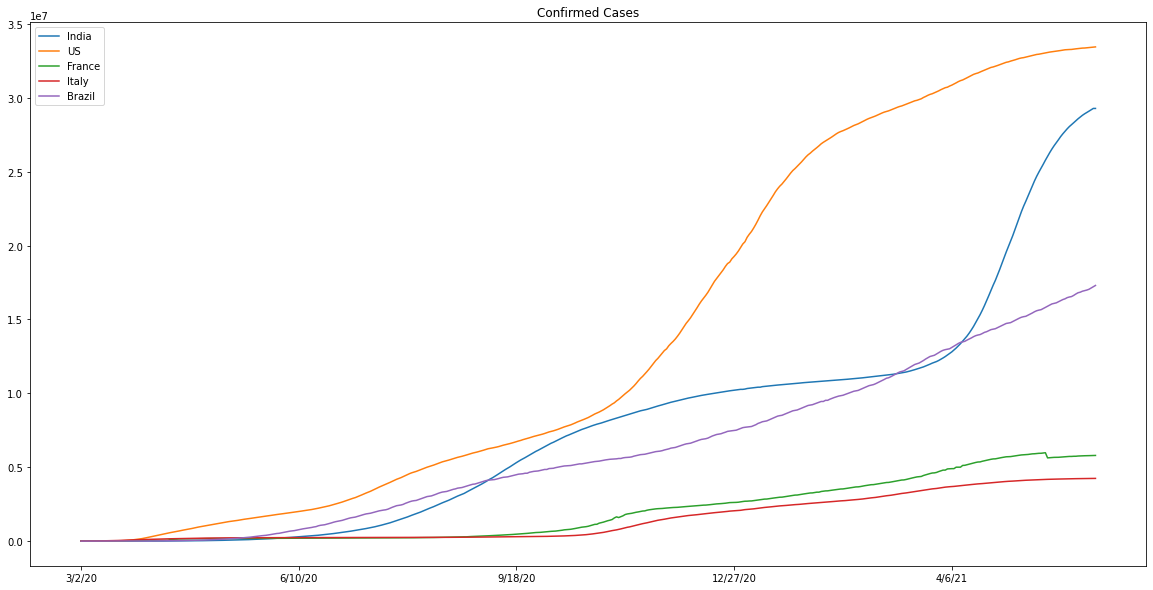

In [63]:
#visualization
countries = ['India', 'US', 'France', 'Italy', 'Brazil']

for country in countries:
    confirmed[country][40:].plot(figsize=(20, 10))
plt.title('Confirmed Cases')
plt.legend(loc='upper left')
plt.show()

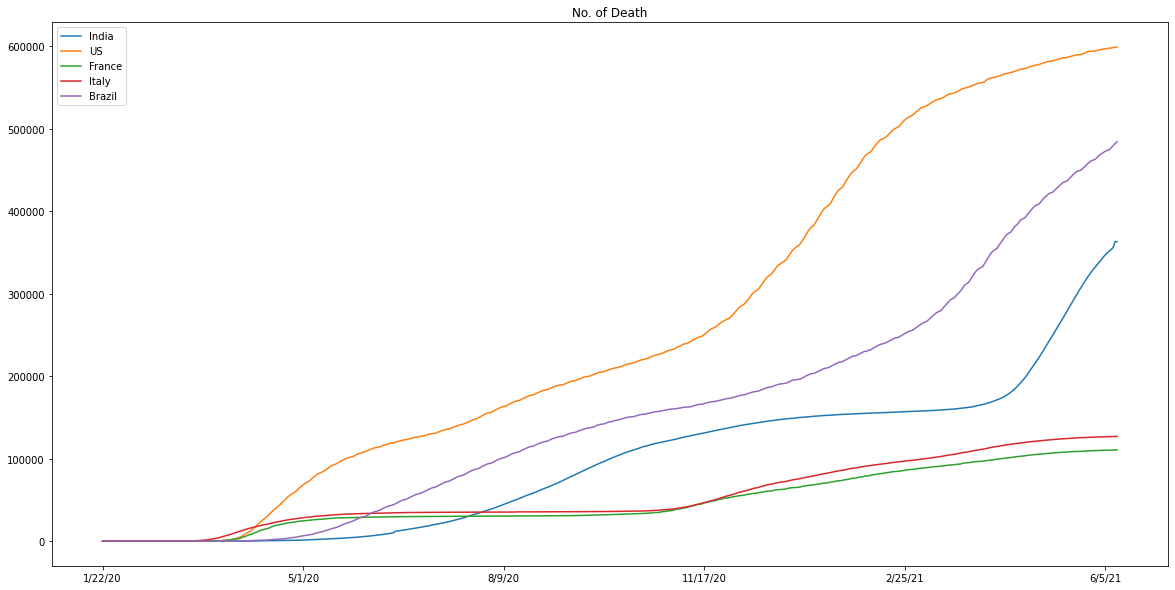

In [64]:
#visualization
countries = ['India', 'US', 'France', 'Italy', 'Brazil']

for country in countries:
    death[country].plot(figsize=(20, 10))
plt.title('No. of Death')
plt.legend(loc='upper left')
plt.show()

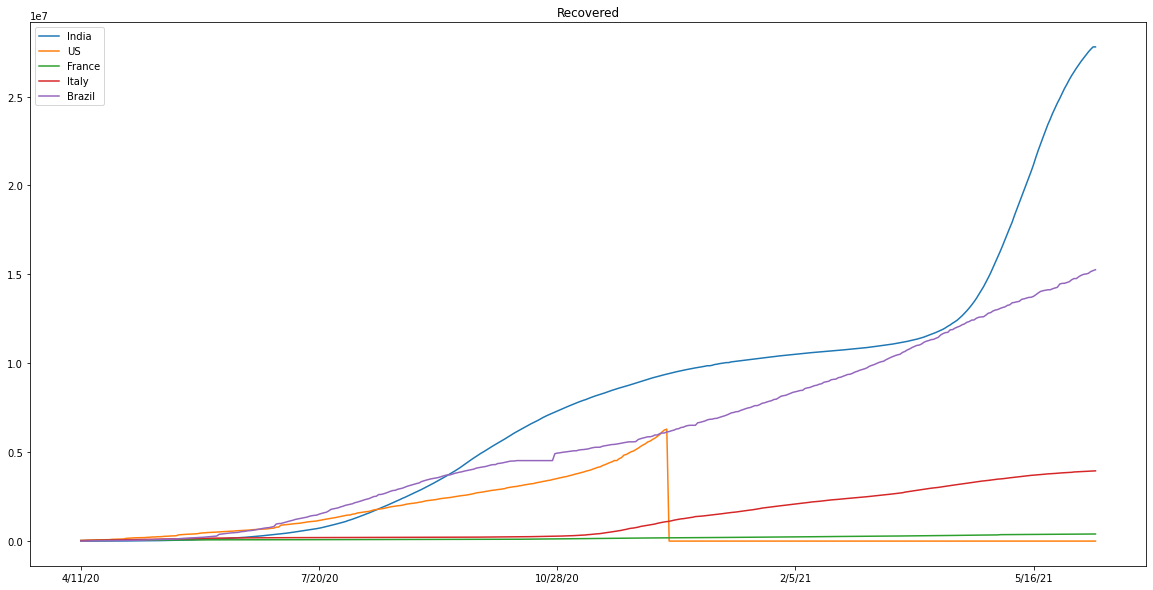

In [65]:
#visualization
countries = ['India', 'US', 'France', 'Italy', 'Brazil']


for country in countries:
    recovered[country][80:].plot(figsize=(20, 10))
plt.title('Recovered')
plt.legend(loc='upper left')
plt.show()

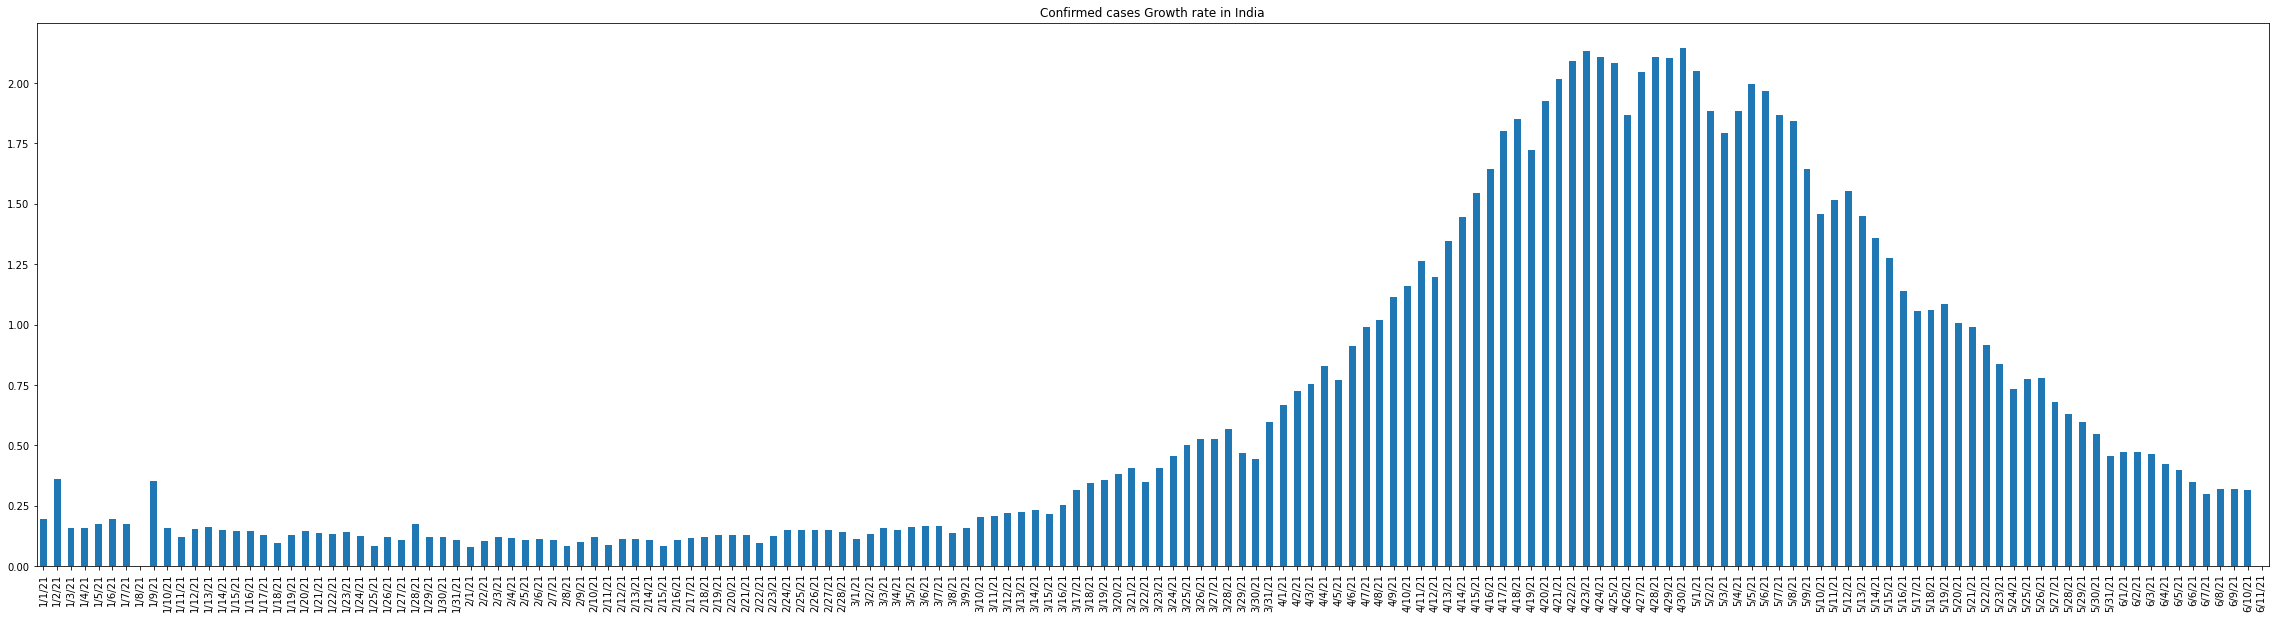

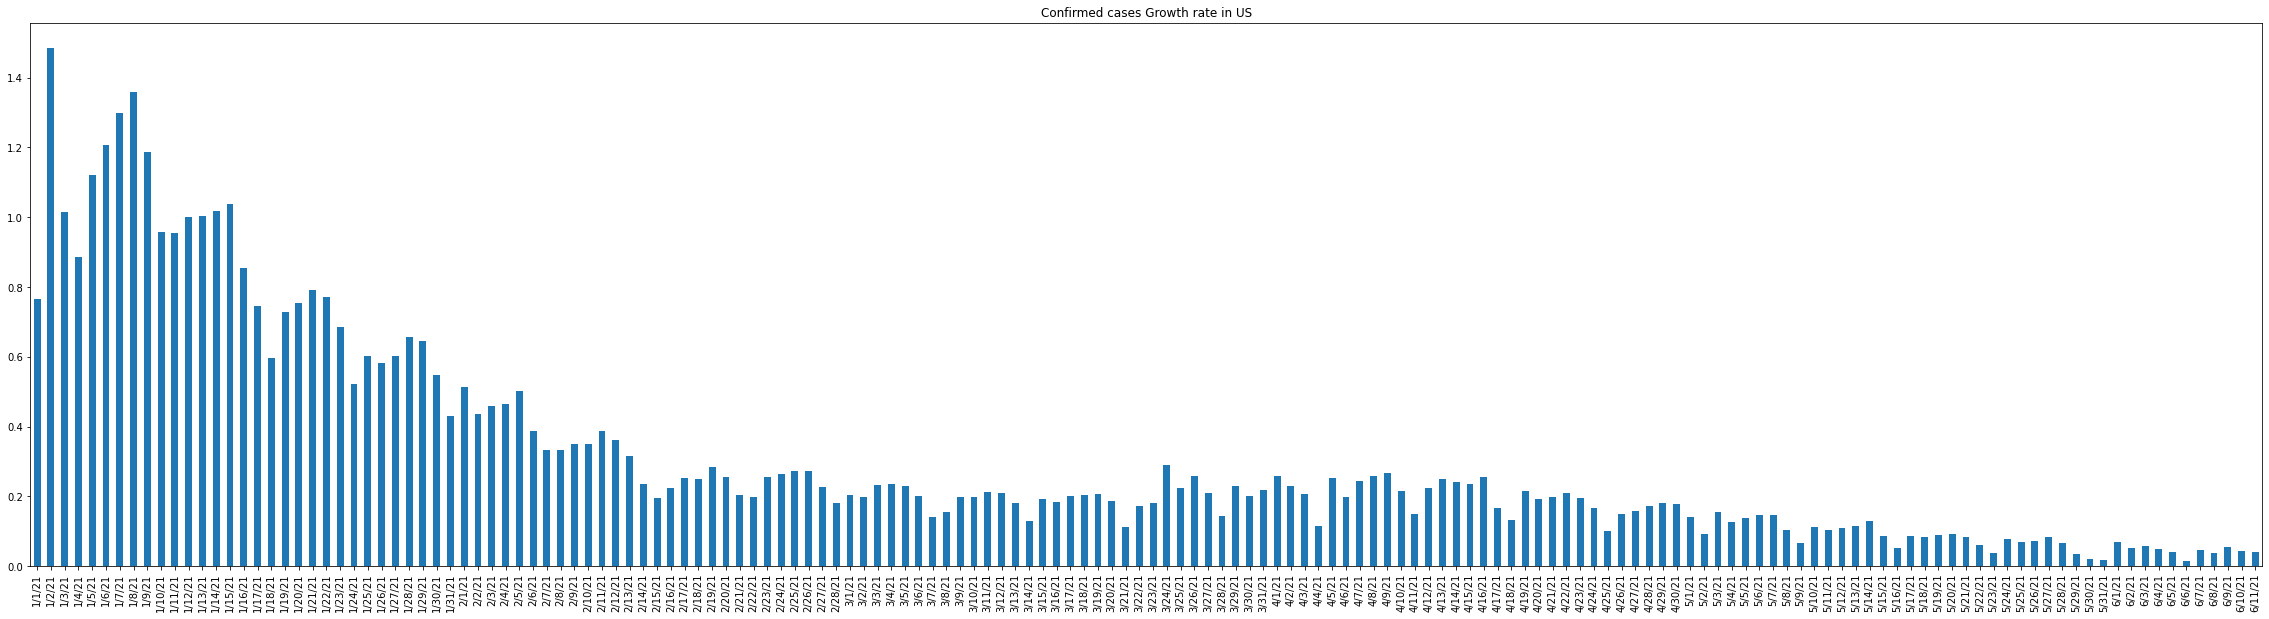

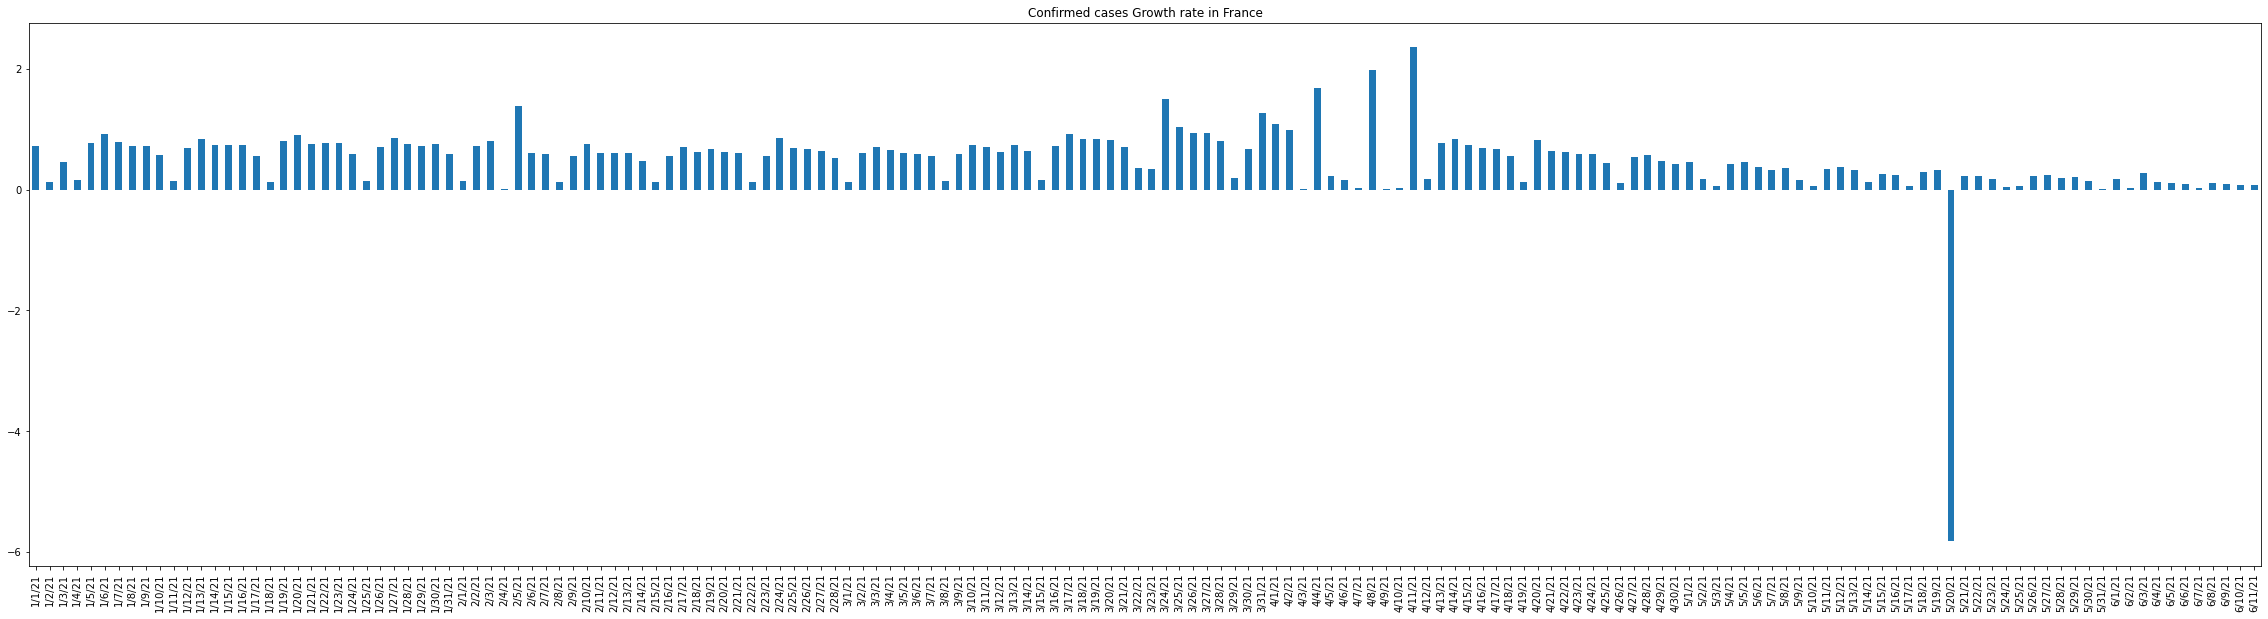

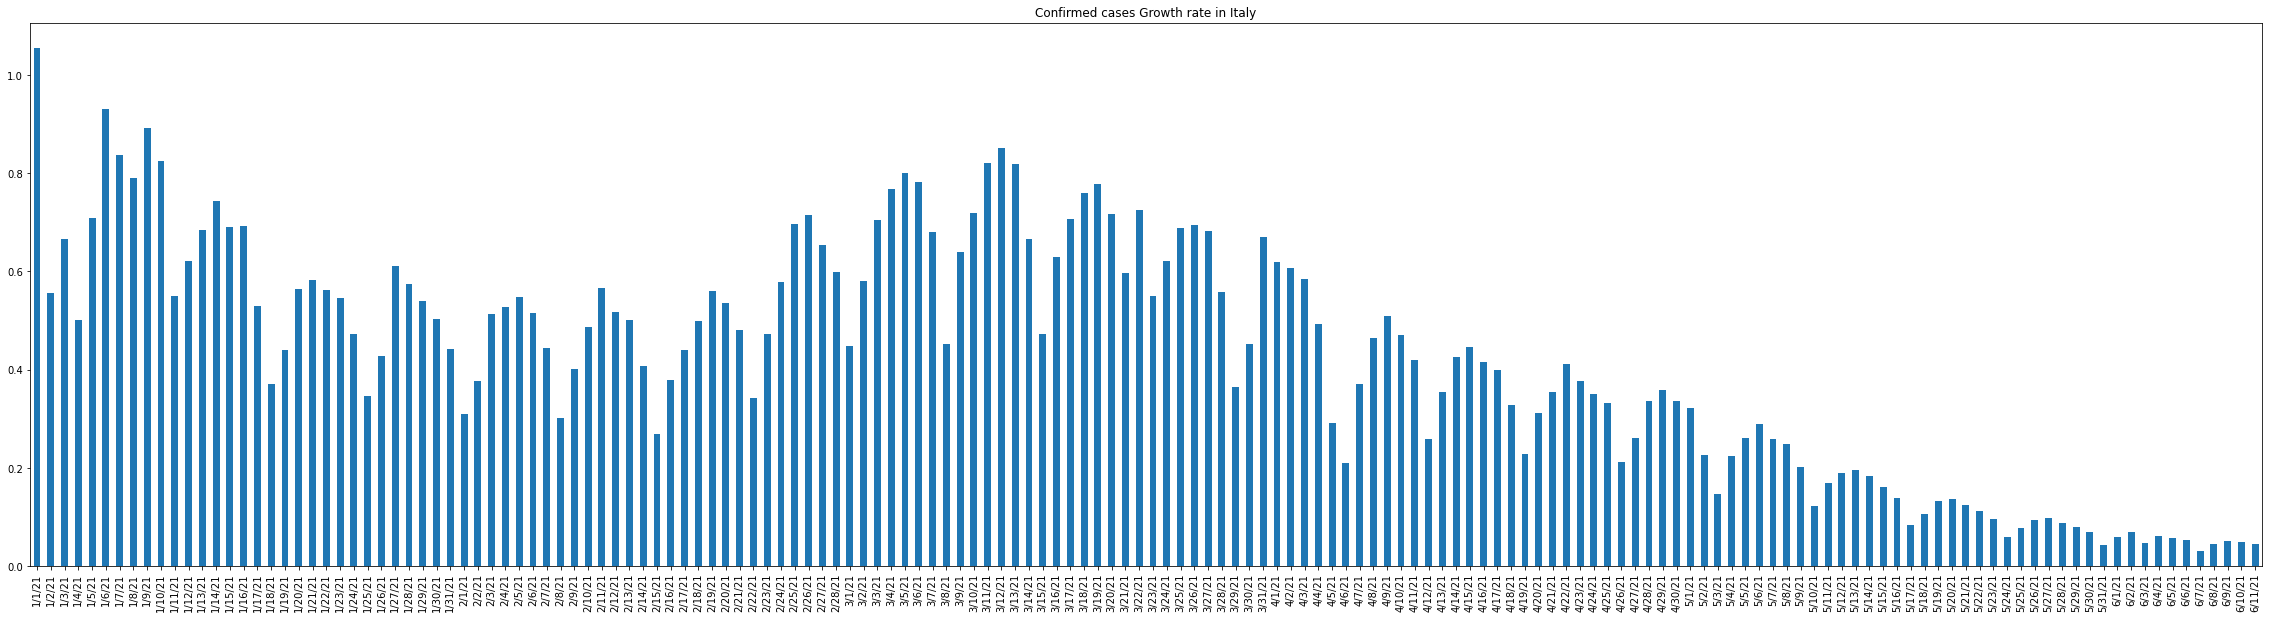

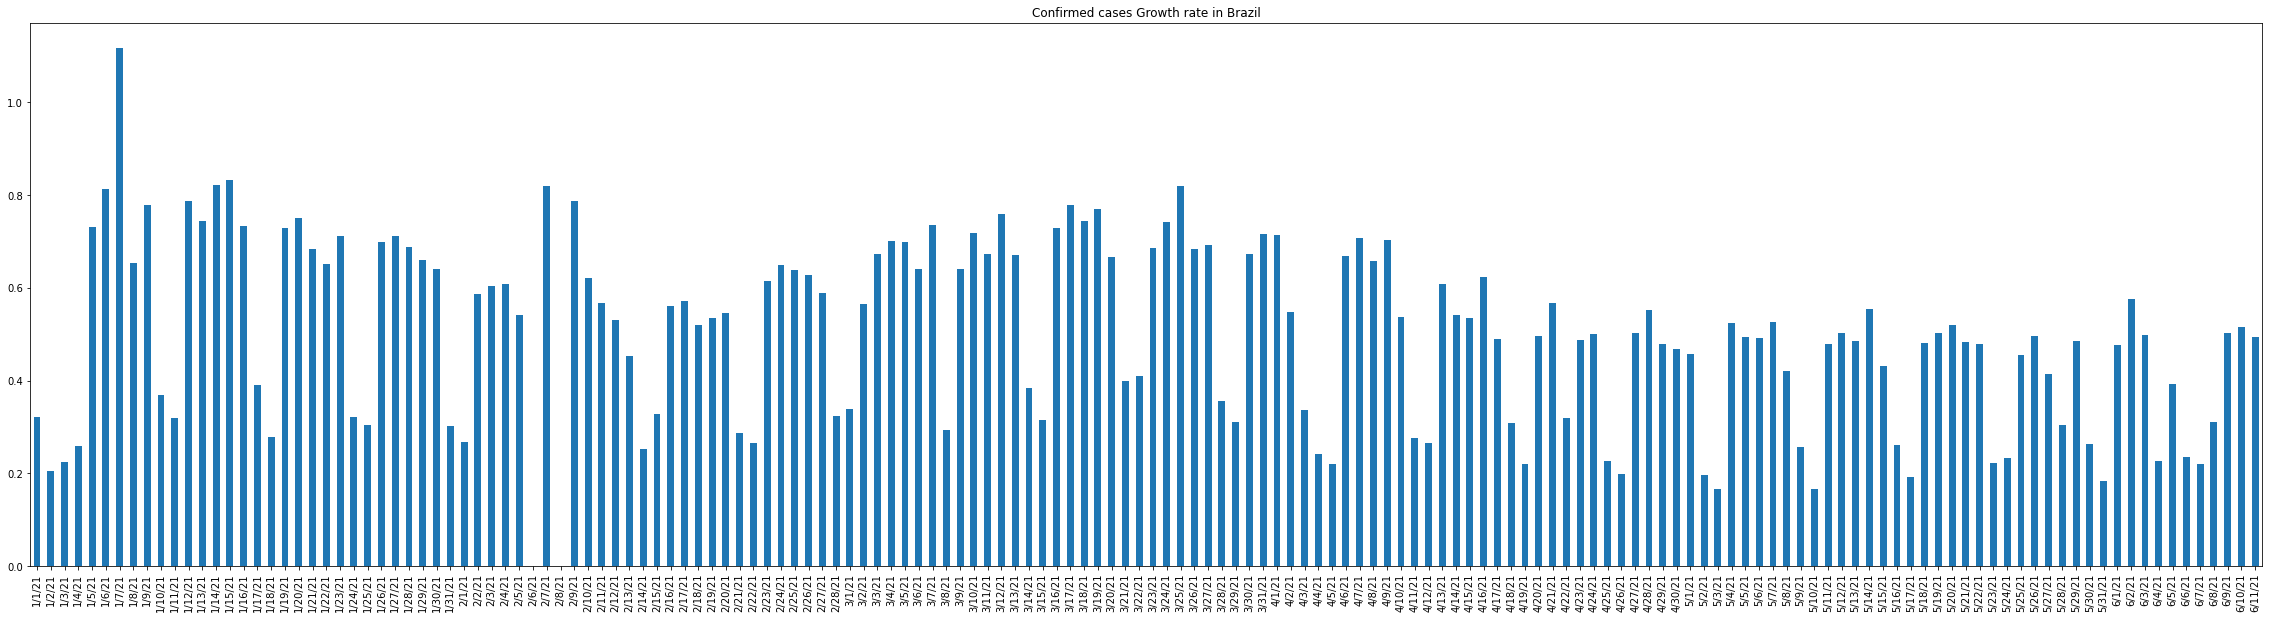

In [66]:
#growth rate of countries this year
countries = ['India', 'US', 'France', 'Italy', 'Brazil']
for country in countries:
    growth_rate[country][345:].plot.bar(figsize=(40, 10))
    plt.title(f'Confirmed cases Growth rate in {country}')
    plt.show()

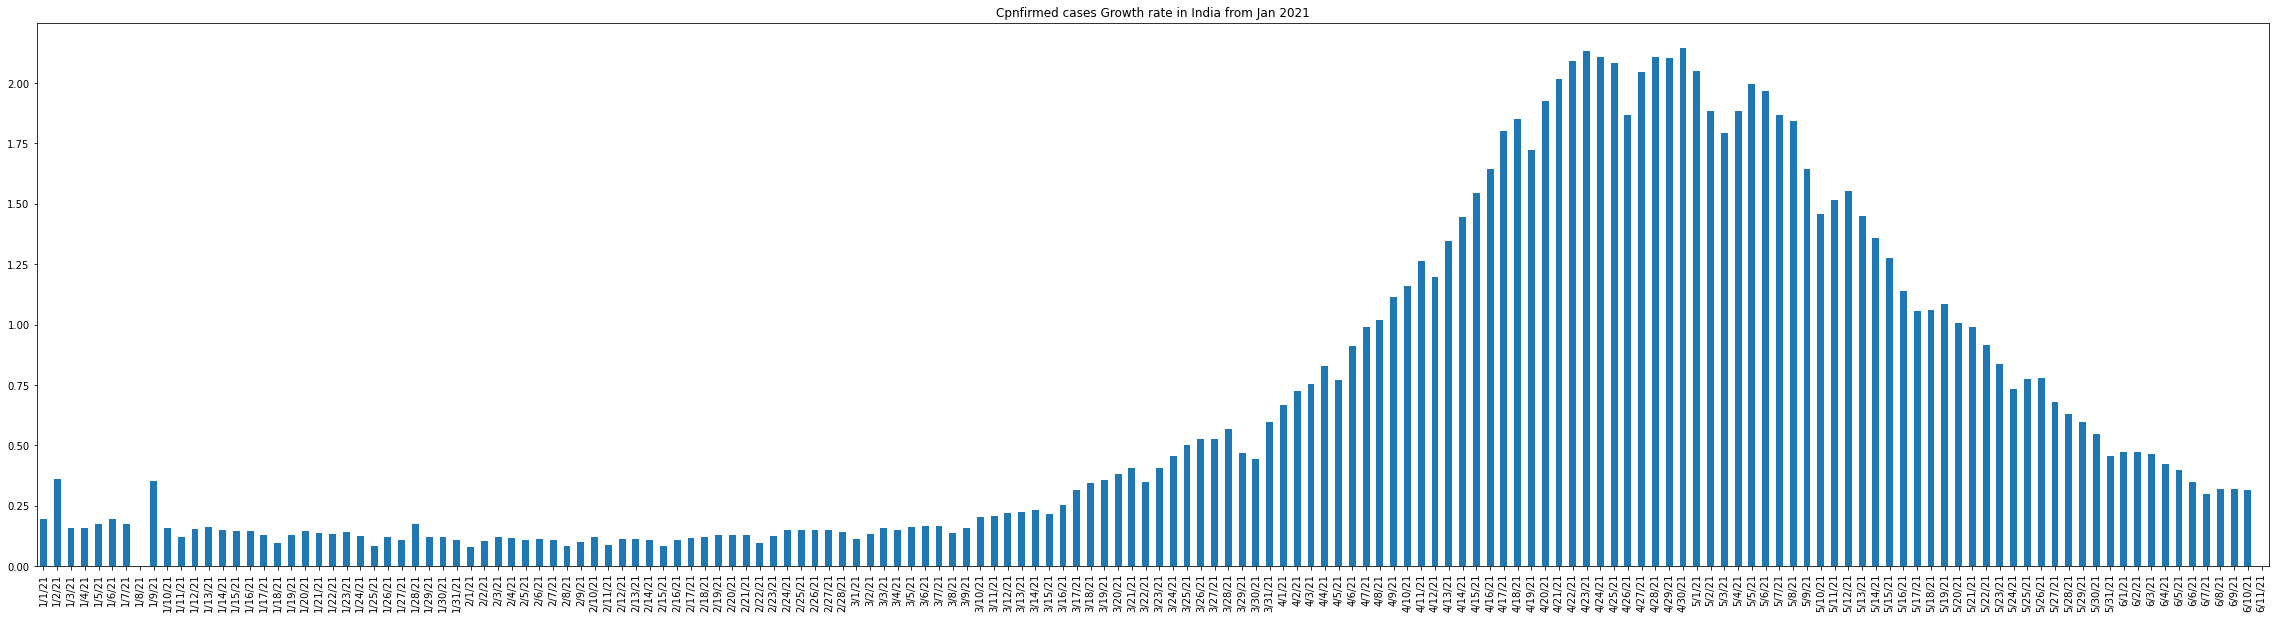

In [67]:
#growth rate in India
growth_rate['India'][345:].plot.bar(figsize=(40, 10))
plt.title('Cpnfirmed cases Growth rate in India from Jan 2021')
plt.show()

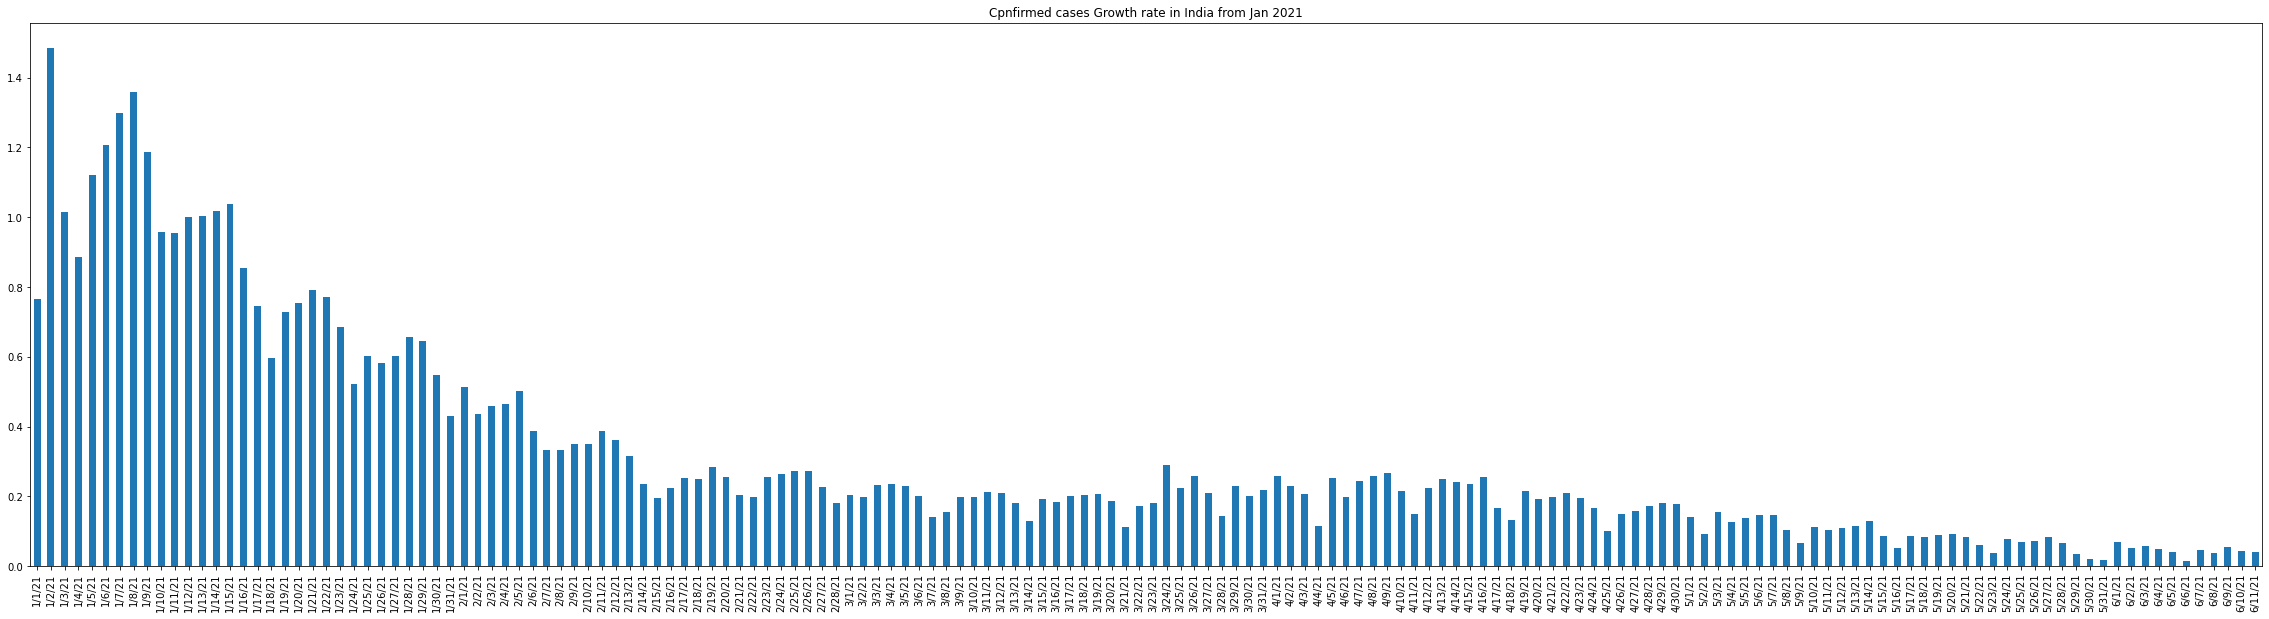

In [68]:
#growth rate in US
growth_rate['US'][345:].plot.bar(figsize=(40, 10))
plt.title('Cpnfirmed cases Growth rate in India from Jan 2021')
plt.show()

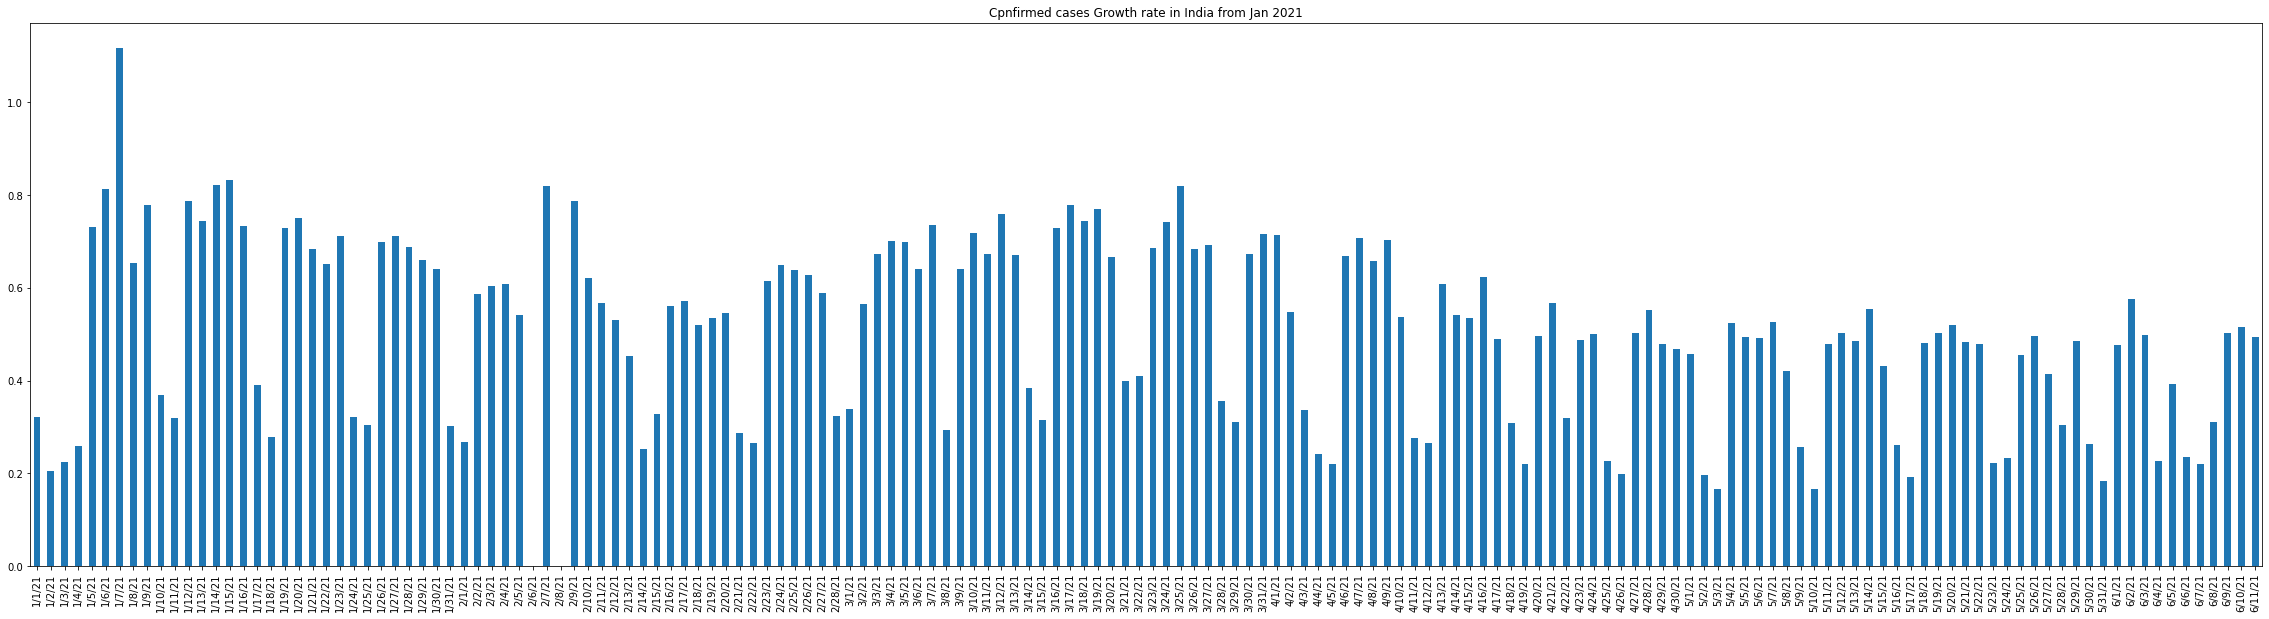

In [69]:
#growth rate in Brazil
growth_rate['Brazil'][345:].plot.bar(figsize=(40, 10))
plt.title('Cpnfirmed cases Growth rate in India from Jan 2021')
plt.show()

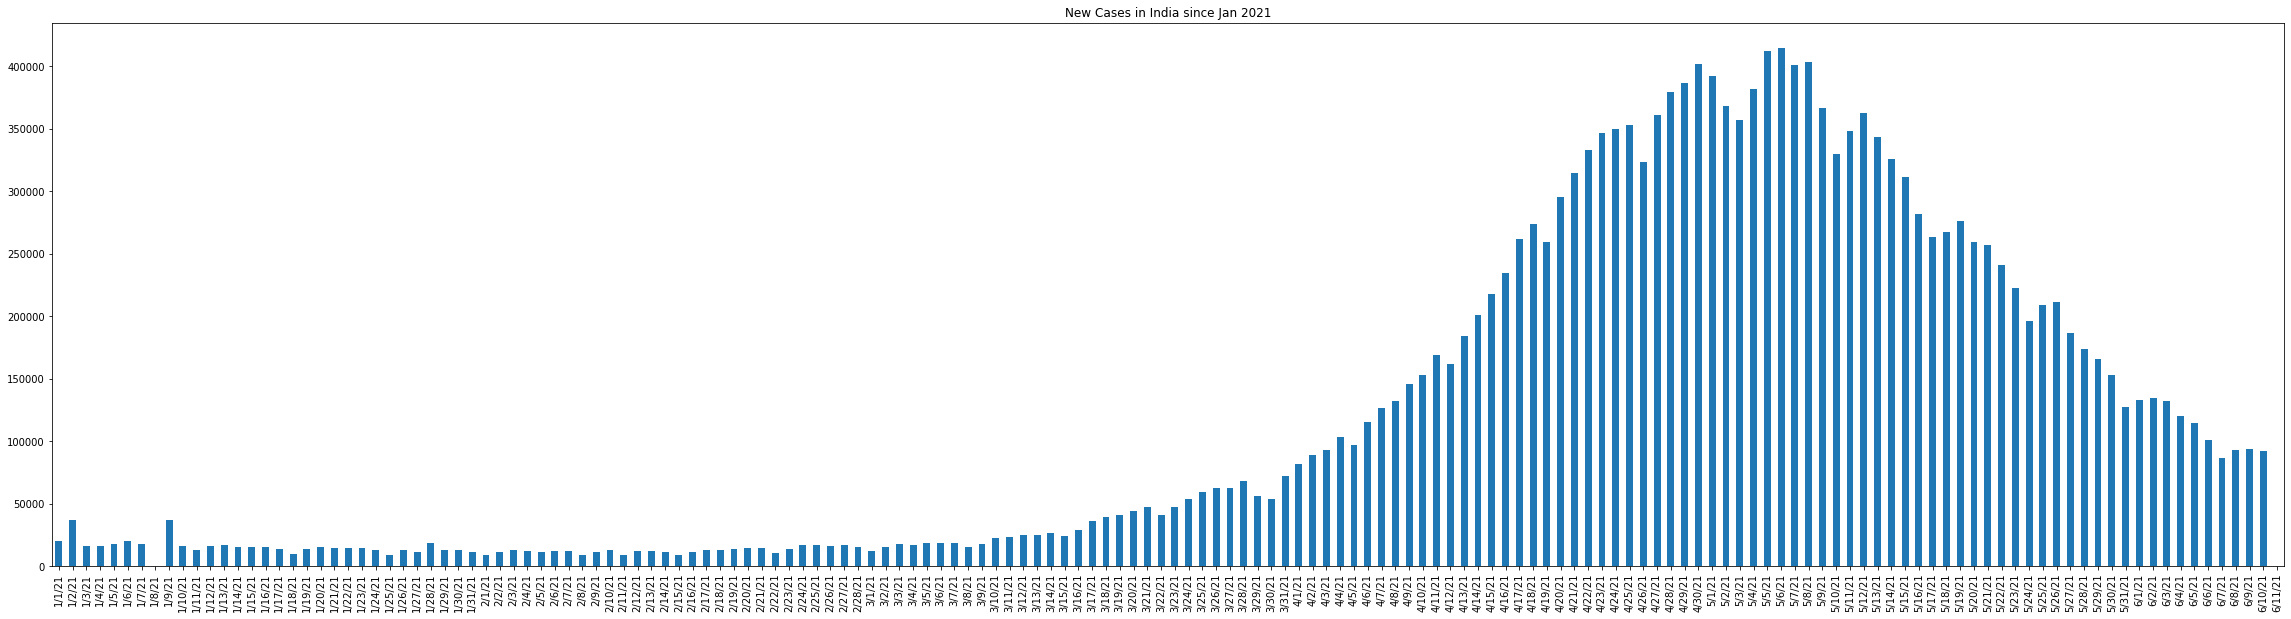

In [70]:
new_cases['India'][345:].plot.bar(figsize=(40, 10))
plt.title('New Cases in India since Jan 2021')
plt.show()

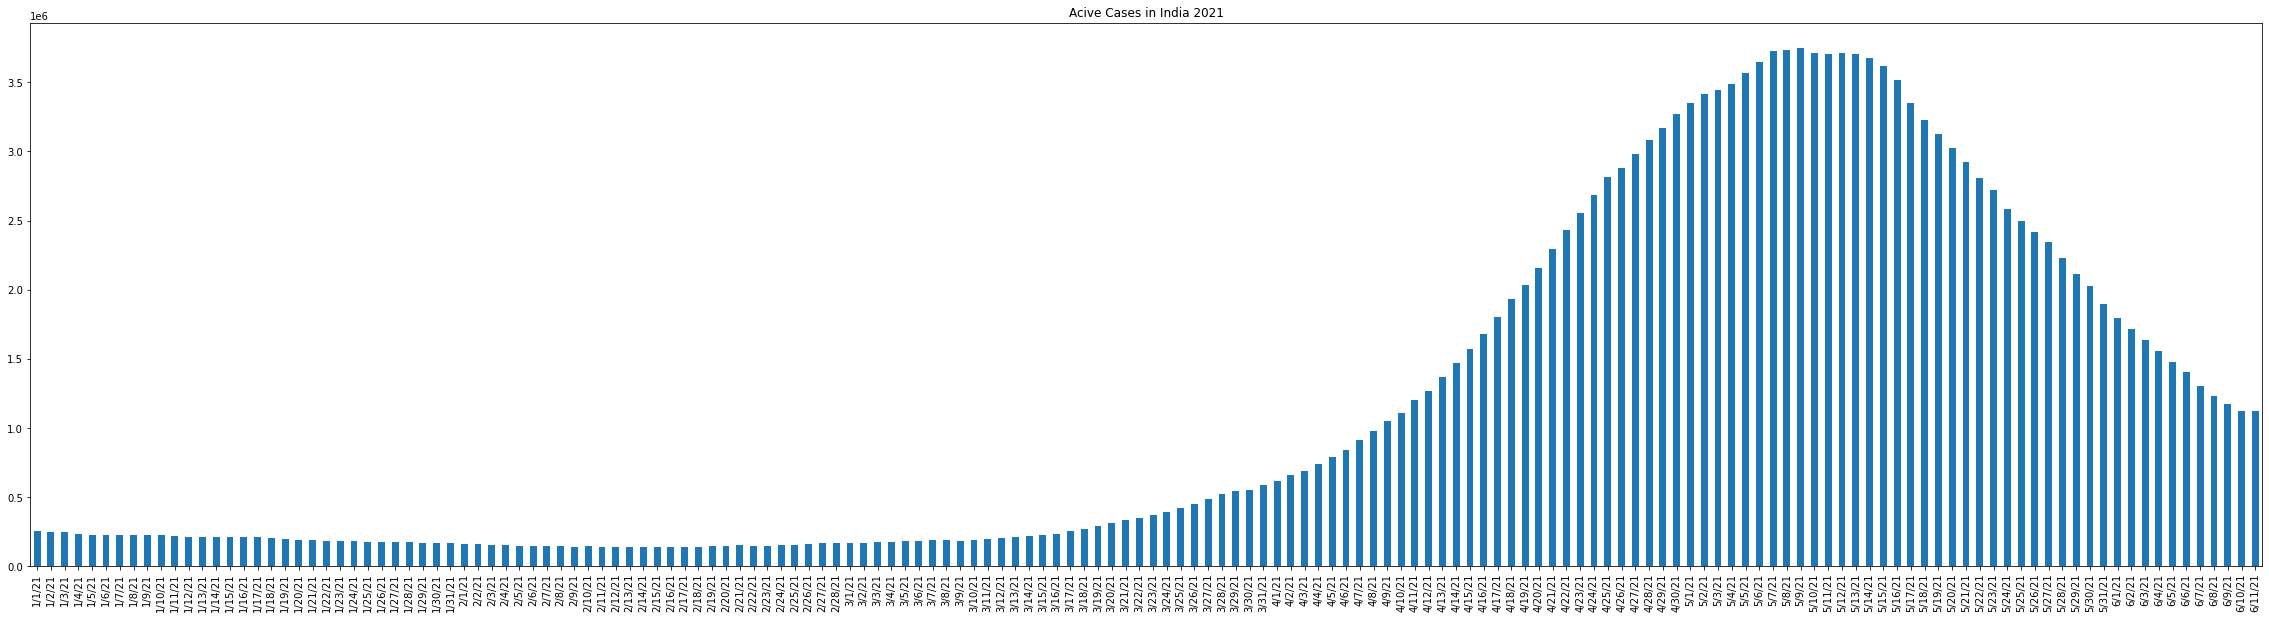

In [71]:
active_cases['India'][345:].plot.bar(figsize=(40, 10))
plt.title('Acive Cases in India 2021')
plt.show()

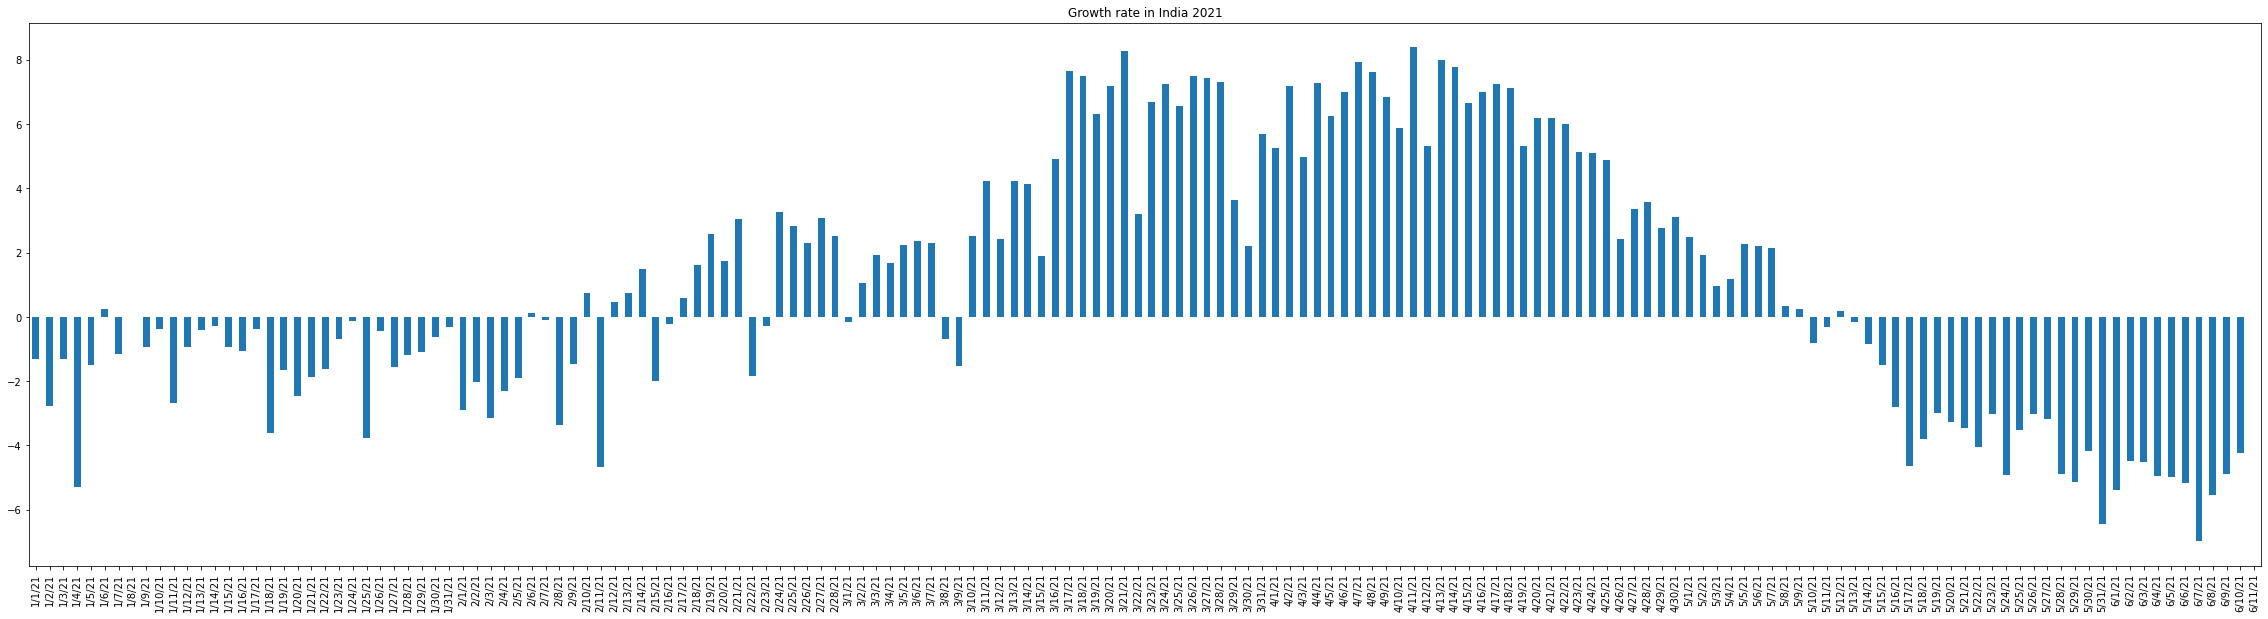

In [72]:
overall_growth_rate['India'][345:].plot.bar(figsize=(40, 10))
plt.title('Growth rate in India 2021')
plt.show()

**The negative values are because the active cases on the previous day was much higher than the actual day**

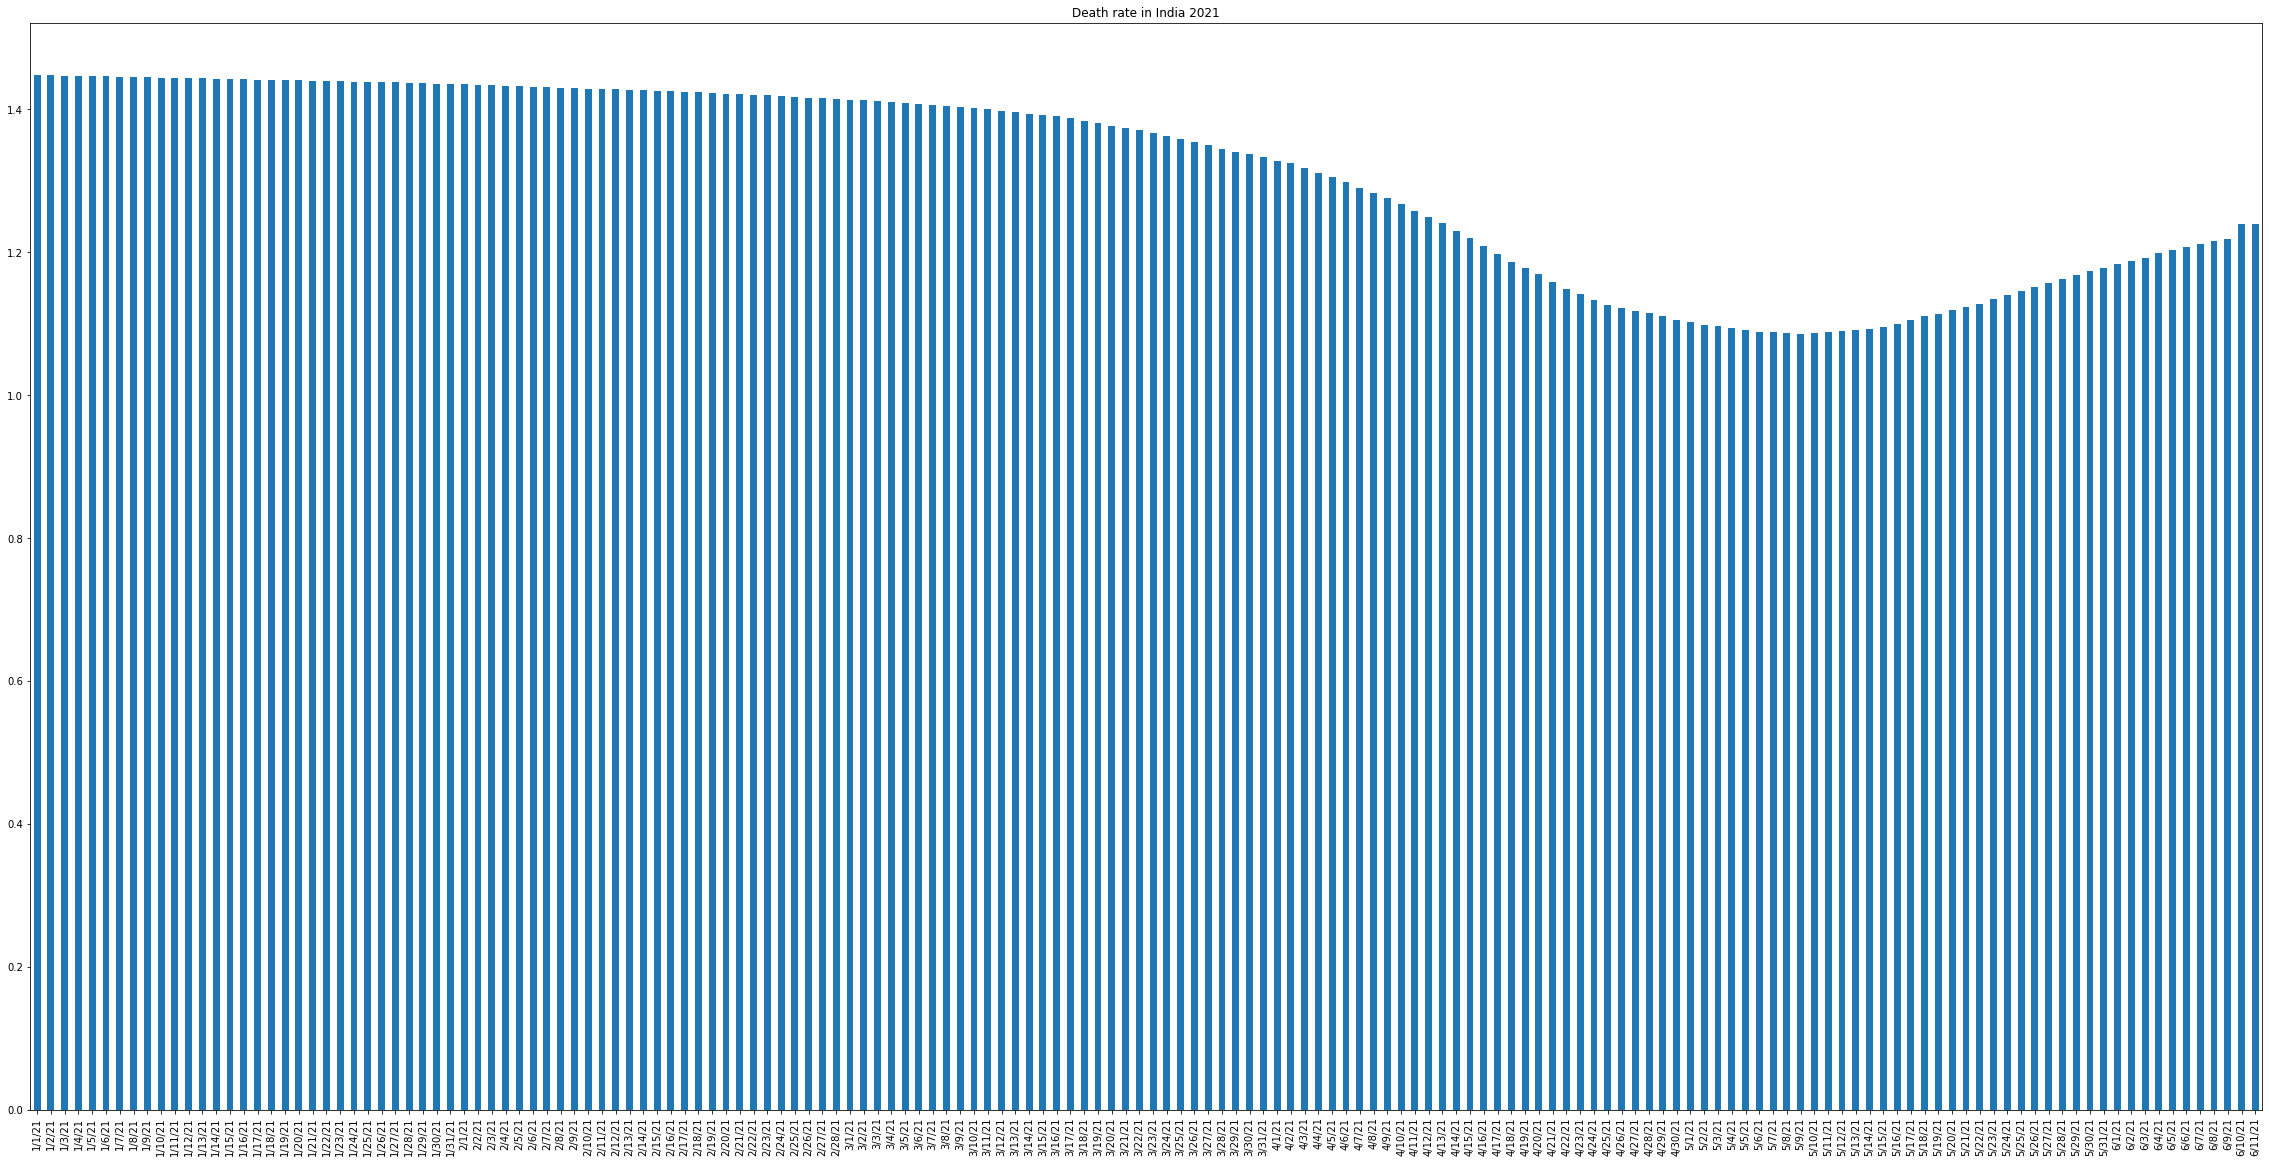

In [73]:
death_rate['India'][345:].plot.bar(figsize=(40,20))
plt.title('Death rate in India 2021')
plt.show()

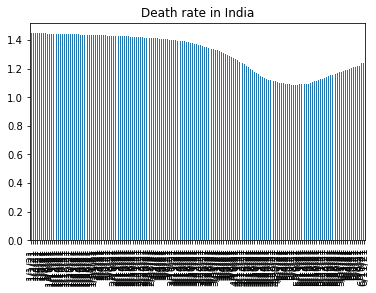

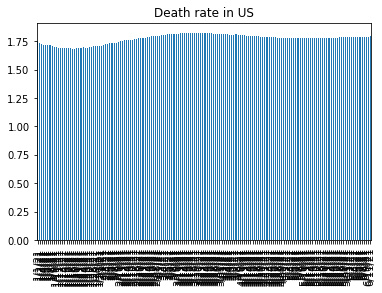

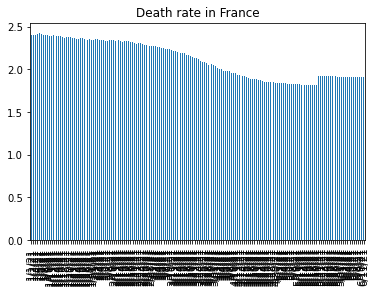

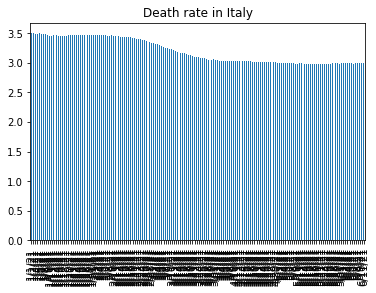

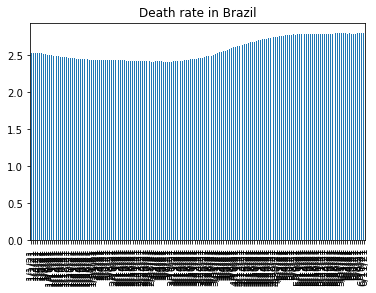

In [74]:
countries = ['India', 'US', 'France', 'Italy', 'Brazil']
for country in countries:
    death_rate[country][345:].plot.bar()
    plt.title(f'Death rate in {country}')
    plt.show()

# Make a Prediction

In [78]:
simulated_growth_rate = 0.05

dates = pd.date_range(start = '6/12/2021', periods = 40, freq = 'D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index = dates))
simulated


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07/17/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/18/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/19/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/20/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [80]:
for day in range(len(confirmed), len(confirmed) + 40):
  simulated.iloc[day] = simulated.iloc[day - 1] * (1 + simulated_growth_rate)
simulated

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,548.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,643.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,920.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,3.000000,0.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1406.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0

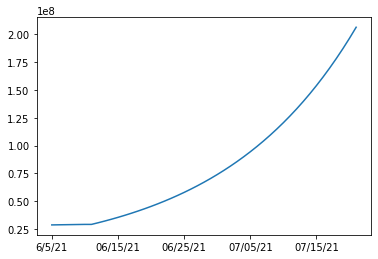

In [87]:
simulated['India'][500:].plot()
plt.show()

**The above graph is for 5% predicted growth rate**